In [13]:
import fix_yahoo_finance as yf
from pandas_datareader import data as pdr
from pandas_datareader import data
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import urllib.request
import time
import numpy as np
from datetime import datetime



In [2]:
stocks_start = datetime(2019, 4, 10)
stocks_end = datetime(2019, 4, 20)

In [58]:
def pullData4aStock(stock, startdate, enddate,method="yahoo"):
    import fix_yahoo_finance as yf
    from pandas_datareader import data as pdr
    from pandas_datareader import data
    import pandas as pd
    from alpha_vantage.timeseries import TimeSeries
    import quandl

    '''
    :param stock: one stock symple e.g "AAPL"
    :param startdate: e.g. datetime(2014, 1, 2)
    :param enddate: e.g. datetime(2017, 11, 10)
    :return: a data frame
    '''
    if method=="yahoo":
        pulledData=pdr.get_data_yahoo(stock, startdate, enddate)
    elif method=="quandl":
        pulledData=quandl.get("WIKI/"+stock, startdate, enddate, api_key='MqrLS-v2QJ8BJrs_R5sm')
    elif method=="alpha":
        ts=TimeSeries(key='ACLIMSOTBCT8K3GV', output_format='pandas')
        pulledData, meta_data = ts.get_intraday(symbol=stock,interval='1min', outputsize='compact')

    return pulledData
    # return pdr.get_data_quandl(stock, stocks_start, stocks_end,api_key='MqrLS-v2QJ8BJrs_R5sm')

def pullData4StockList(stocksToPull, startdate, enddate,method="yahoo"):
    '''

    :param stock: e.g.  ["AAPL","CMG"]
    :param startdate: e.g. datetime(2014, 1, 2)
    :param enddate: e.g. datetime(2017, 11, 10)
    :return: a dictionary with key as stcok symbol
    '''
    Stocks_dict={x:pullData4aStock(x, startdate=startdate, enddate=enddate,method=method) for x in stocksToPull}

    return pd.concat(Stocks_dict.values(),keys=Stocks_dict.keys())

def get(tickers, start, end):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start, end)
    datas = [data(ticker) for ticker in tickers]
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

In [17]:
pulled=pullData4StockList(["CMG","AAPL"],startdate= stocks_start, enddate=stocks_end,method="yahoo")

In [5]:
pulled

High         Low        Open       Close    Volume  \
     Date                                                                   
CMG  2019-04-10  719.440002  711.000000  711.000000  718.849976    460500   
     2019-04-11  713.020020  705.179993  711.840027  707.530029    781800   
     2019-04-12  715.250000  707.500000  707.500000  712.440002    417200   
     2019-04-15  714.489990  708.349976  712.190002  712.270020    271800   
     2019-04-16  716.650024  704.760010  716.650024  706.479980    444300   
     2019-04-17  699.940002  686.500000  699.409973  688.210022    865900   
     2019-04-18  700.000000  687.000000  695.000000  700.000000    644000   
AAPL 2019-04-10  200.740005  198.179993  198.679993  200.619995  21695300   
     2019-04-11  201.000000  198.440002  200.850006  198.949997  20900800   
     2019-04-12  200.139999  196.210007  199.199997  198.869995  27760700   
     2019-04-15  199.850006  198.009995  198.580002  199.229996  17536600   
     2019-04-16  201.369995  198.559998  199.460007  199.250000  25696400   
     2019-04-17  203.380005  198.610001  199.539993  203.130005  28906800   
     2019-04-18  204.149994  202.520004  203.119995  203.860001  24195800   

                  Adj Close  
     Date                    
CMG  2019-04-10  718.849976  
     2019-04-11  707.530029  
     2019-04-12  712.440002  
     2019-04-15  712.270020  
     2019-04-16  706.479980  
     2019-04-17  688.210022  
     2019-04-18  700.000000  
AAPL 2019-04-10  200.619995  
     2019-04-11  198.949997  
     2019-04-12  198.869995  
     2019-04-15  199.229996  
     2019-04-16  199.250000  
     2019-04-17  203.130005  
     2019-04-18  203.860001

In [37]:
pulled_unstacked=pulled.reset_index([0]).rename(columns={'level_0':'symbol'})
pulled_unstacked

,symbol,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2019-04-10,CMG,719.44,711.00,711.00,718.85,460500,718.85
2019-04-11,CMG,713.02,705.18,711.84,707.53,781800,707.53
2019-04-12,CMG,715.25,707.50,707.50,712.44,417200,712.44
2019-04-15,CMG,714.49,708.35,712.19,712.27,271800,712.27
2019-04-16,CMG,716.65,704.76,716.65,706.48,444300,706.48
2019-04-17,CMG,699.94,686.50,699.41,688.21,865900,688.21
...,...,...,...,...,...,...,...
2019-04-11,AAPL,201.00,198.44,200.85,198.95,20900800,198.95
2019-04-12,AAPL,200.14,196.21,199.20,198.87,27760700,198.87


In [19]:
pulled.loc['CMG','2019-04-15']

High            714.49
Low             708.35
Open            712.19
Close           712.27
Volume       271800.00
Adj Close       712.27
Name: (CMG, 2019-04-15 00:00:00), dtype: float64

In [38]:
pulled_stack_col=pulled.unstack(0)
pulled_stack_col

High             Low            Open           Close          \
               CMG    AAPL     CMG    AAPL     CMG    AAPL     CMG    AAPL   
Date                                                                         
2019-04-10  719.44  200.74  711.00  198.18  711.00  198.68  718.85  200.62   
2019-04-11  713.02  201.00  705.18  198.44  711.84  200.85  707.53  198.95   
2019-04-12  715.25  200.14  707.50  196.21  707.50  199.20  712.44  198.87   
2019-04-15  714.49  199.85  708.35  198.01  712.19  198.58  712.27  199.23   
2019-04-16  716.65  201.37  704.76  198.56  716.65  199.46  706.48  199.25   
2019-04-17  699.94  203.38  686.50  198.61  699.41  199.54  688.21  203.13   
2019-04-18  700.00  204.15  687.00  202.52  695.00  203.12  700.00  203.86   

            Volume           Adj Close          
               CMG      AAPL       CMG    AAPL  
Date                                            
2019-04-10  460500  21695300    718.85  200.62  
2019-04-11  781800  20900800    707.53  198.95  
2019-04-12  417200  27760700    712.44  198.87  
2019-04-15  271800  17536600    712.27  199.23  
2019-04-16  444300  25696400    706.48  199.25  
2019-04-17  865900  28906800    688.21  203.13  
2019-04-18  644000  24195800    700.00  203.86

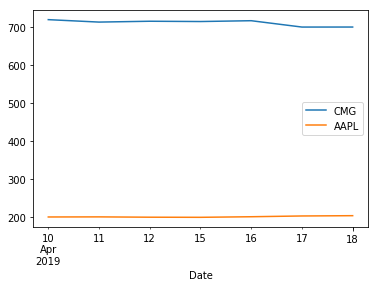

In [8]:
pulled.unstack(0)['High'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB12C204E0>,
      dtype=object)

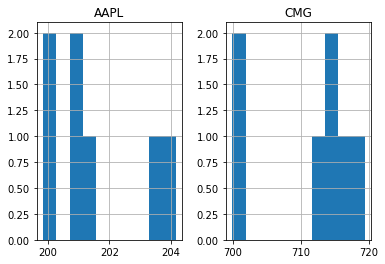

In [15]:
pulled.unstack(0)['High'].hist()

## example

In [50]:
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
msft=pullData4aStock('MSFT', start, end,"yahoo")

In [51]:
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.96,26.39,26.55,26.77,6.473e+07,22.312
2012-01-04,27.47,26.78,26.82,27.40,8.052e+07,22.837
2012-01-05,27.73,27.29,27.38,27.68,5.608e+07,23.071
2012-01-06,28.19,27.53,27.53,28.11,9.946e+07,23.429
2012-01-09,28.10,27.72,28.05,27.74,5.971e+07,23.121


In [55]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)

In [56]:
all_data.head()

High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2012-01-03  58.929  58.429  58.486  58.747  7.556e+07     39.173
       2012-01-04  59.240  58.469  58.571  59.063  6.501e+07     39.383
       2012-01-05  59.793  58.953  59.279  59.719  6.782e+07     39.821
       2012-01-06  60.393  59.889  59.967  60.343  7.957e+07     40.237
       2012-01-09  61.107  60.193  60.786  60.247  9.851e+07     40.173

In [57]:
all_data.tail()

High    Low   Open  Close     Volume  Adj Close
Ticker Date                                                        
KO     2014-12-24  43.23  42.92  43.10  42.94  6.406e+06     37.312
       2014-12-26  43.30  42.93  42.97  42.96  6.467e+06     37.330
       2014-12-29  43.06  42.49  42.80  42.86  8.694e+06     37.243
       2014-12-30  42.99  42.65  42.74  42.76  9.222e+06     37.156
       2014-12-31  42.94  42.22  42.92  42.22  9.370e+06     36.687

## index data

In [59]:
sp500 = pdr.get_data_yahoo('^GSPC', start, end)
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.62,1258.86,1258.86,1277.06,3943710000,1277.06
2012-01-04,1278.73,1268.10,1277.03,1277.30,3592580000,1277.30
2012-01-05,1283.05,1265.26,1277.30,1281.06,4315950000,1281.06
2012-01-06,1281.84,1273.34,1280.93,1277.81,3656830000,1277.81
2012-01-09,1281.99,1274.55,1277.83,1280.70,3371600000,1280.70


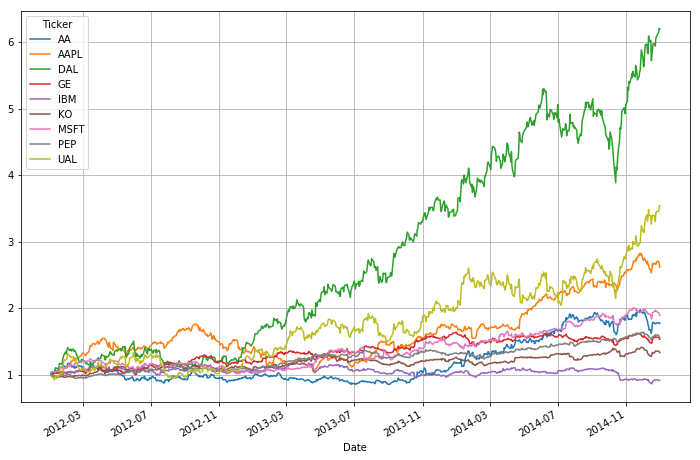

In [60]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
daily_close_px = just_closing_prices.pivot('Date', 'Ticker', 'Adj Close')
daily_close_px.head()
(daily_close_px.pct_change() + 1).cumprod().plot(figsize=(12, 8), grid=True);

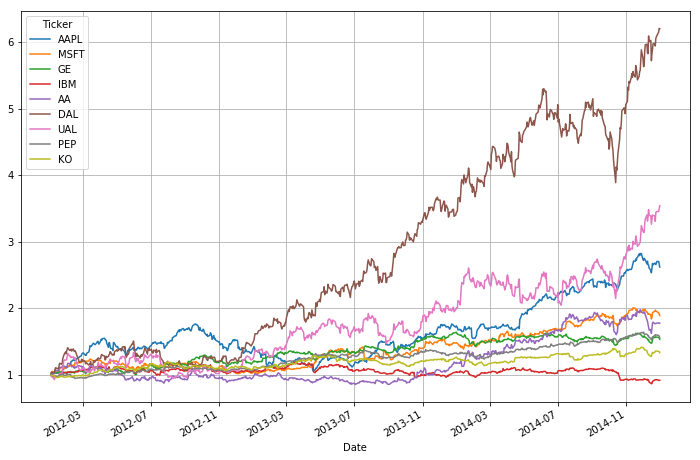

In [64]:
(all_data.unstack(0)['Adj Close'].pct_change()+1).cumprod().plot(figsize=(12, 8), grid=True)

In [65]:
all_data.unstack(0)['Adj Close']

Ticker,AAPL,MSFT,GE,IBM,AA,DAL,UAL,PEP,KO
Date,,,,,,,,,
2012-01-03,39.173,22.312,13.679,146.470,20.893,7.335,18.90,53.646,27.580
2012-01-04,39.383,22.837,13.828,145.873,21.391,7.308,18.52,53.921,27.407
2012-01-05,39.821,23.071,13.821,145.181,21.188,7.600,18.39,53.500,27.277
2012-01-06,40.237,23.429,13.895,143.514,20.735,7.591,18.21,52.830,27.104
2012-01-09,40.173,23.121,14.052,142.767,21.346,7.554,17.93,53.105,27.104
2012-01-10,40.317,23.204,13.948,142.547,21.369,7.545,17.48,53.048,27.266
...,...,...,...,...,...,...,...,...,...
2014-12-23,104.509,43.952,21.467,135.429,36.890,43.573,62.48,85.832,37.339
2014-12-24,104.017,43.671,21.426,135.078,36.984,44.423,64.93,85.594,37.312


In [67]:
all_data.reset_index().pivot('Date', 'Ticker', 'Adj Close')

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2012-01-03,20.893,39.173,7.335,13.679,146.470,27.580,22.312,53.646,18.90
2012-01-04,21.391,39.383,7.308,13.828,145.873,27.407,22.837,53.921,18.52
2012-01-05,21.188,39.821,7.600,13.821,145.181,27.277,23.071,53.500,18.39
2012-01-06,20.735,40.237,7.591,13.895,143.514,27.104,23.429,52.830,18.21
2012-01-09,21.346,40.173,7.554,14.052,142.767,27.104,23.121,53.105,17.93
2012-01-10,21.369,40.317,7.545,13.948,142.547,27.266,23.204,53.048,17.48
...,...,...,...,...,...,...,...,...,...
2014-12-23,36.890,104.509,43.573,21.467,135.429,37.339,43.952,85.832,62.48
2014-12-24,36.984,104.017,44.423,21.426,135.078,37.312,43.671,85.594,64.93


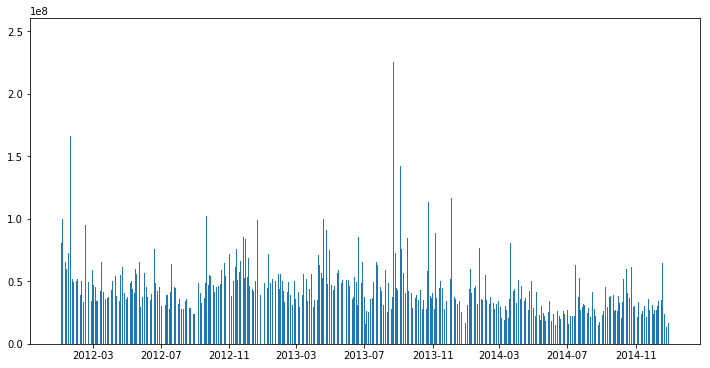

In [68]:
msftV = all_data.Volume.loc['MSFT']
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12, 6)

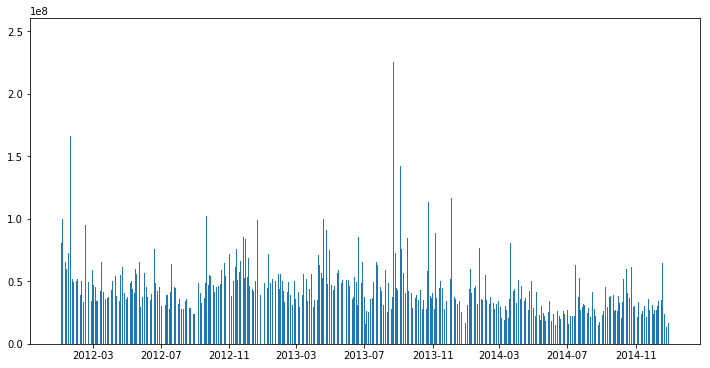

In [69]:
msftV = all_data.loc['MSFT'].Volume
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12, 6)

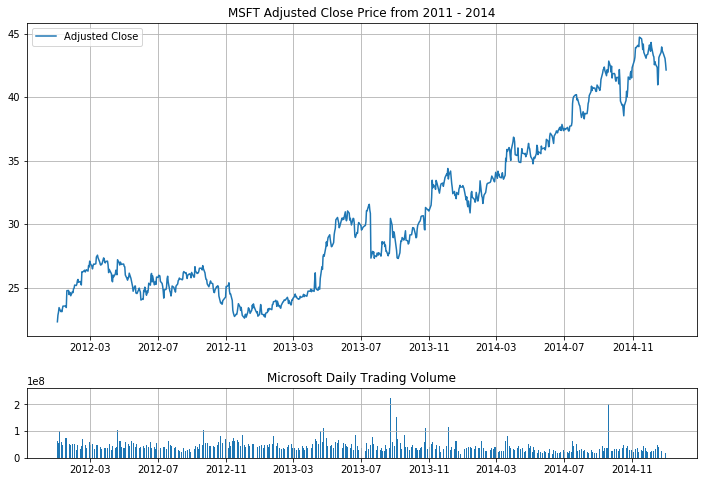

In [70]:
# Combined price and volumes

top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
top.plot(daily_close_px.index, 
         daily_close_px.MSFT, 
         label='Adjusted Close')
top.grid(True)
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
bottom.grid(True)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12, 8)
plt.subplots_adjust(hspace=0.75)

In [72]:
all_data

High     Low    Open   Close     Volume  Adj Close
Ticker Date                                                            
AAPL   2012-01-03  58.929  58.429  58.486  58.747  7.556e+07     39.173
       2012-01-04  59.240  58.469  58.571  59.063  6.501e+07     39.383
       2012-01-05  59.793  58.953  59.279  59.719  6.782e+07     39.821
       2012-01-06  60.393  59.889  59.967  60.343  7.957e+07     40.237
       2012-01-09  61.107  60.193  60.786  60.247  9.851e+07     40.173
       2012-01-10  60.857  60.214  60.844  60.463  6.455e+07     40.317
...                   ...     ...     ...     ...        ...        ...
KO     2014-12-23  43.140  42.470  42.540  42.970  1.341e+07     37.339
       2014-12-24  43.230  42.920  43.100  42.940  6.406e+06     37.312
       2014-12-26  43.300  42.930  42.970  42.960  6.467e+06     37.330
       2014-12-29  43.060  42.490  42.800  42.860  8.694e+06     37.243
       2014-12-30  42.990  42.650  42.740  42.760  9.222e+06     37.156
       2014-12-31  42.940  42.220  42.920  42.220  9.370e+06     36.687

[6786 rows x 6 columns]

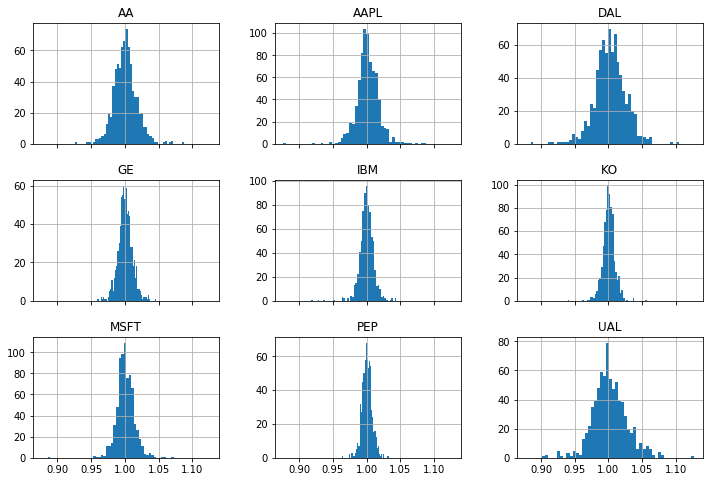

In [75]:
daily_pct_change=daily_close_px.pct_change() + 1
(daily_pct_change).hist(bins=50, sharex=True, figsize=(12, 8));

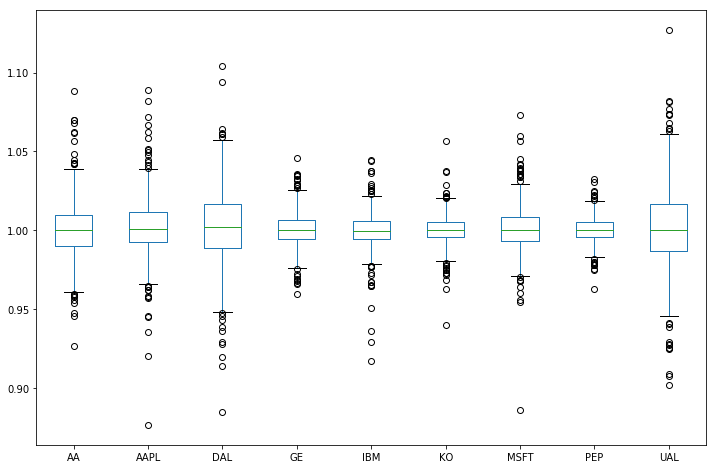

In [76]:
daily_pct_change.plot(kind='box', figsize=(12, 8));

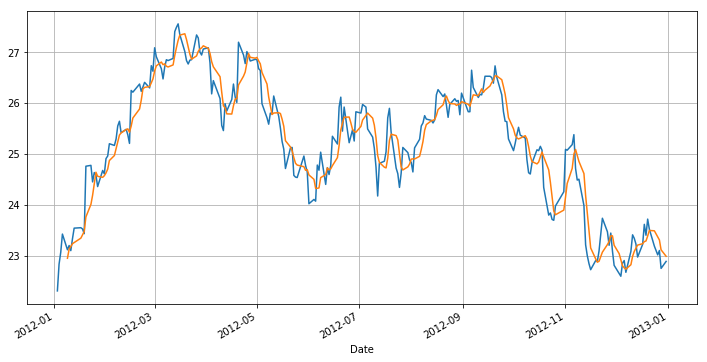

In [82]:
msftAC =all_data.loc['MSFT']['2012']['Adj Close']
msftAC.plot(figsize=(12, 6), grid=True);
msftAC.rolling(window=5, center=False).mean().plot(grid=True);

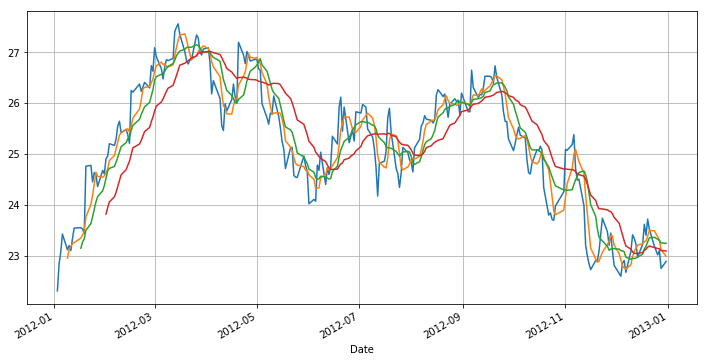

In [84]:
msftAC.plot(figsize=(12, 6))
for period in [5, 10, 21]:
    msftAC.rolling(window=period).mean().plot(grid=True);

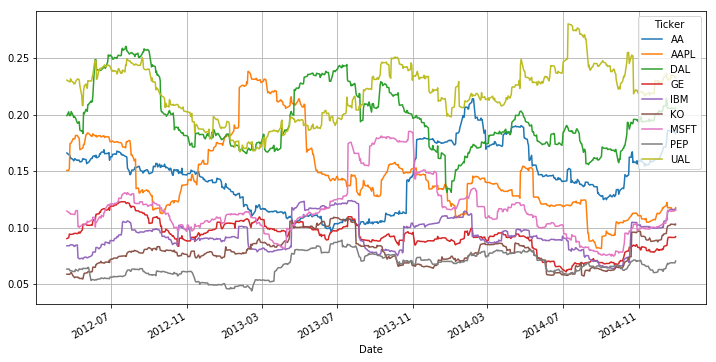

In [85]:
period = 75
vol = daily_pct_change.rolling(window=period).std() * np.sqrt(period)
# he multiplies by np.sqrt(period) to get 75-days volatility. To get annualized volatility he'd have
# to multiply x252 i think

vol.plot(figsize=(12, 6), grid=True);

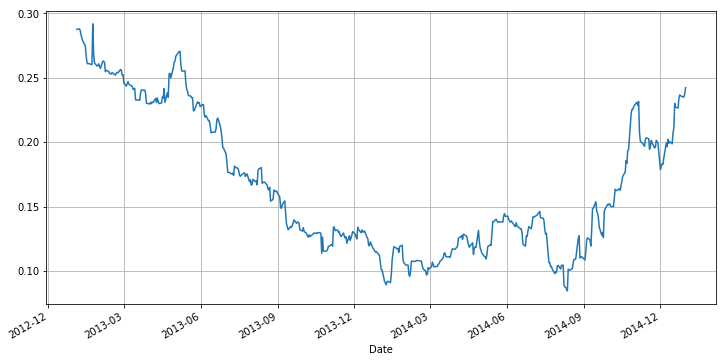

In [89]:
rolling_corr = daily_pct_change.AAPL.rolling(window=252).corr(other=daily_pct_change.MSFT).dropna()

rolling_corr.plot(figsize=(12, 6), grid=True);

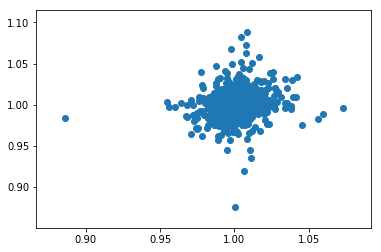

In [90]:
plt.scatter(daily_pct_change.MSFT, daily_pct_change.AAPL);